Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Greykite Seasonality Detection

* Greykite modules: https://linkedin.github.io/greykite/docs/0.1.0/html/_modules/index.html
* Greykite Seasonality Tutorial: https://linkedin.github.io/greykite/docs/0.1.0/html/gallery/quickstart/0300_seasonality.html
  * It also shows how to handle multivariate ts, check its daily seasonality
* Choices of time features: https://linkedin.github.io/greykite/docs/0.1.0/html/gallery/quickstart/0300_seasonality.html#quick-reference
* Parameters for functions: https://linkedin.github.io/greykite/docs/0.1.0/html/pages/autodoc/doc.html

In [1]:
import plotly
import pandas as pd
import matplotlib.pyplot as plt

from greykite.framework.input.univariate_time_series import UnivariateTimeSeries
from greykite.framework.constants import MEAN_COL_GROUP, OVERLAY_COL_GROUP
from greykite.common.constants import TIME_COL
from greykite.common.viz.timeseries_plotting import add_groupby_column, plot_multivariate

In [3]:
ts = UnivariateTimeSeries()

In [4]:
ts_df = pd.read_pickle('../../crystal_ball/data_collector/structured_data/sales_ts.pkl').reset_index()
print(ts_df.shape)

ts_df.head()

(942, 2)


Date  Daily_Sales
0 2013-01-01        58165
1 2013-01-02      4822042
2 2013-01-03      4415571
3 2013-01-04      4587035
4 2013-01-05      4078281

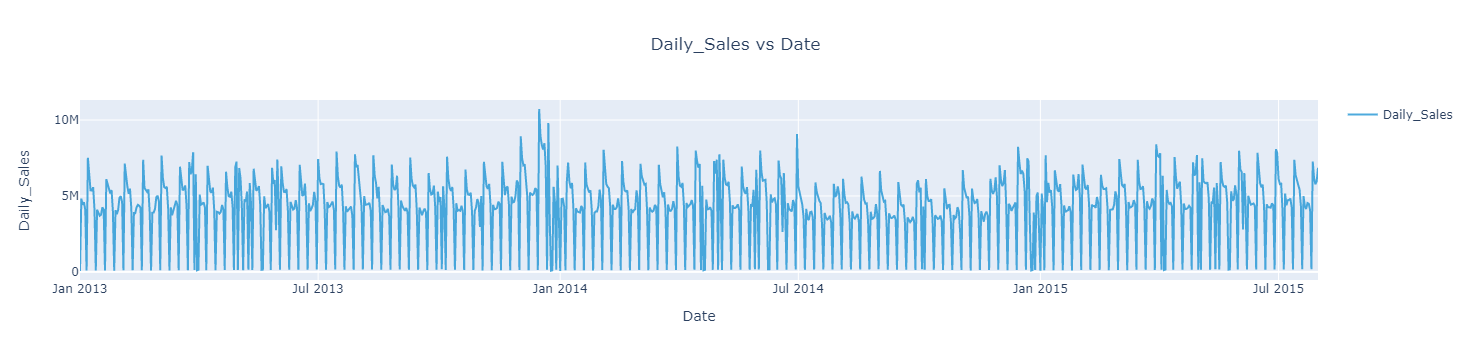

In [5]:
ts.load_data(
     df=ts_df,
     time_col='Date',
     value_col='Daily_Sales',
     freq='D')
fig = ts.plot()
plotly.io.show(fig)

## Yearly Seasonality

* The pattern repeats once a year

### Overall

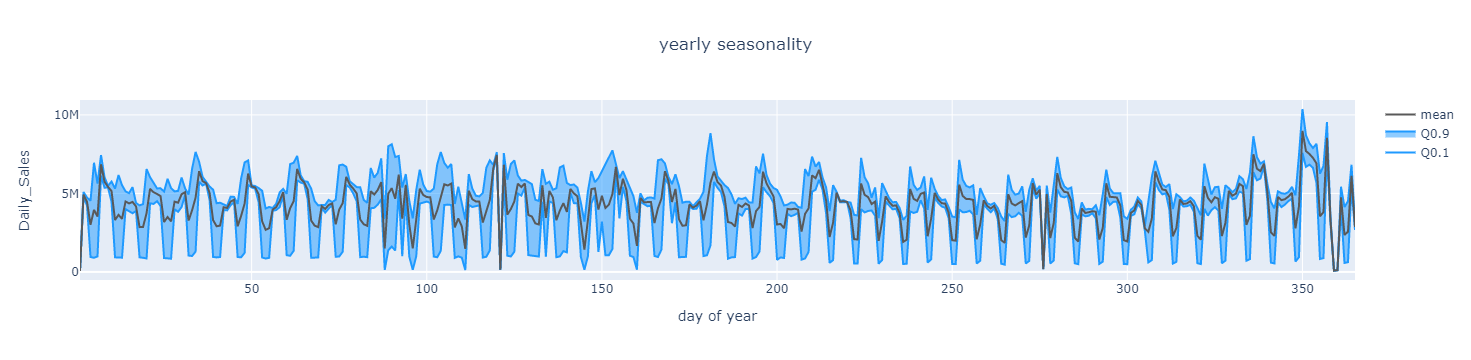

In [6]:
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="doy",
     show_mean=True,       # shows mean on the plot
     show_quantiles=[0.1, 0.9],  # shows quantiles [0.1, 0.9] on the plot
     xlabel="day of year",
     ylabel=ts.original_value_col,
     title="yearly seasonality",
 )
plotly.io.show(fig)

### Overlay Yearly Seasonality

* Overlay shows seasonality pattern split by a dimension of interes (such as yearly, monthly, etc.)
  * When the mean changes over the time, it might be more clear to subtract mean from the overlay and plot
* Here we are trying to see whether there is any year has quite different seasonality pattern
* Set `center_values=True` will shift the plot vertically so that the average effect over a cycle is zero (see the horizontal center line is 0)
  * Better check the uncertered plot first, otherwise might misunderstand the data

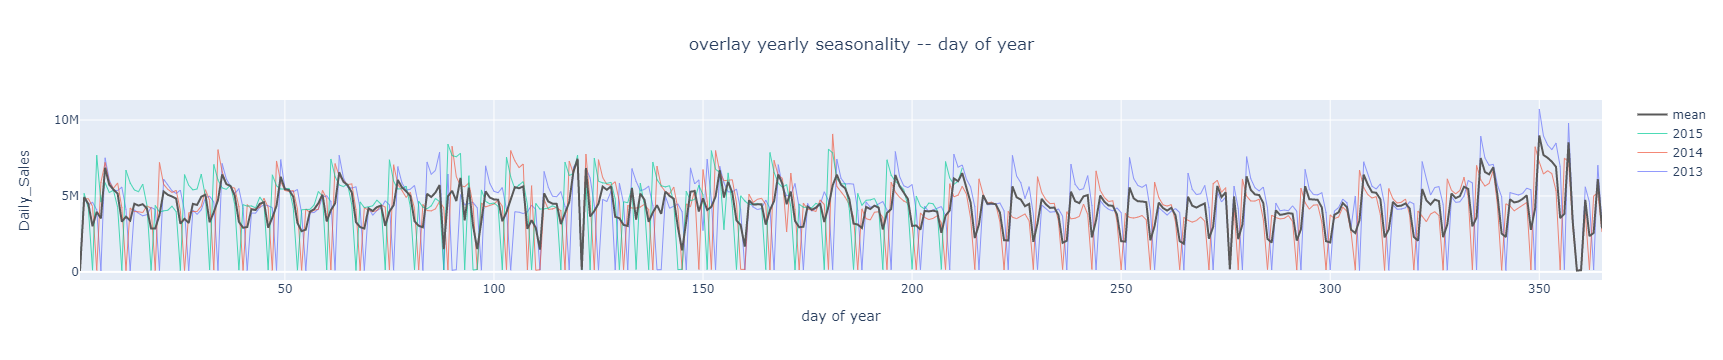

In [7]:
# not centered
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="doy",
     show_mean=True,      
     show_quantiles=False,
     show_overlays=True,            
     overlay_label_time_feature="year",  # splits by "year"
     overlay_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="day of year",
     ylabel=ts.original_value_col,
     title="overlay yearly seasonality -- day of year",
 )
plotly.io.show(fig)

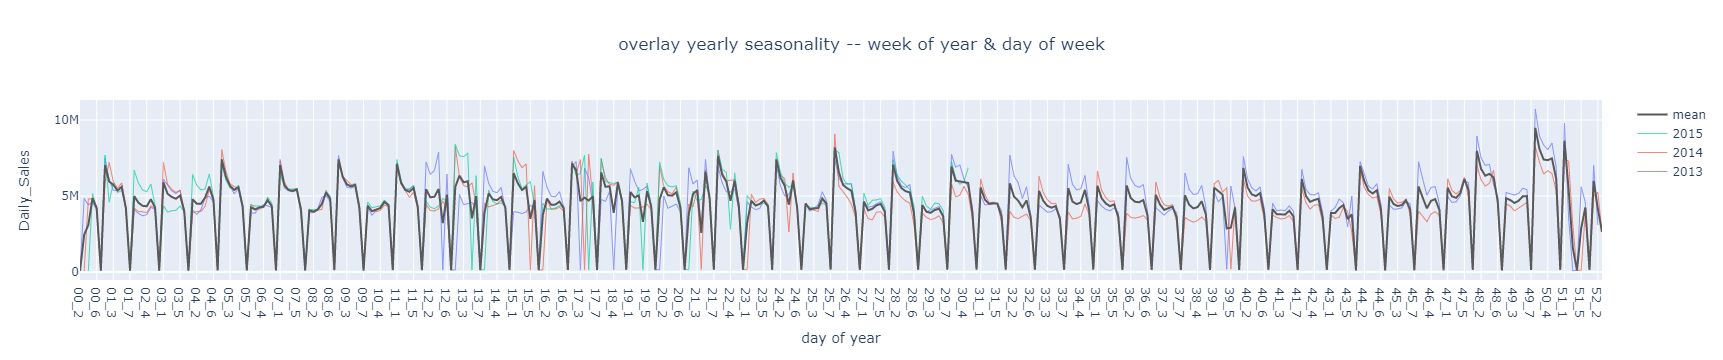

In [8]:
# not centered
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="woy_dow",
     show_mean=True,      
     show_quantiles=False,
     show_overlays=True,            
     overlay_label_time_feature="year",  # splits by "year"
     overlay_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="day of year",
     ylabel=ts.original_value_col,
     title="overlay yearly seasonality -- week of year & day of week",
 )
plotly.io.show(fig)

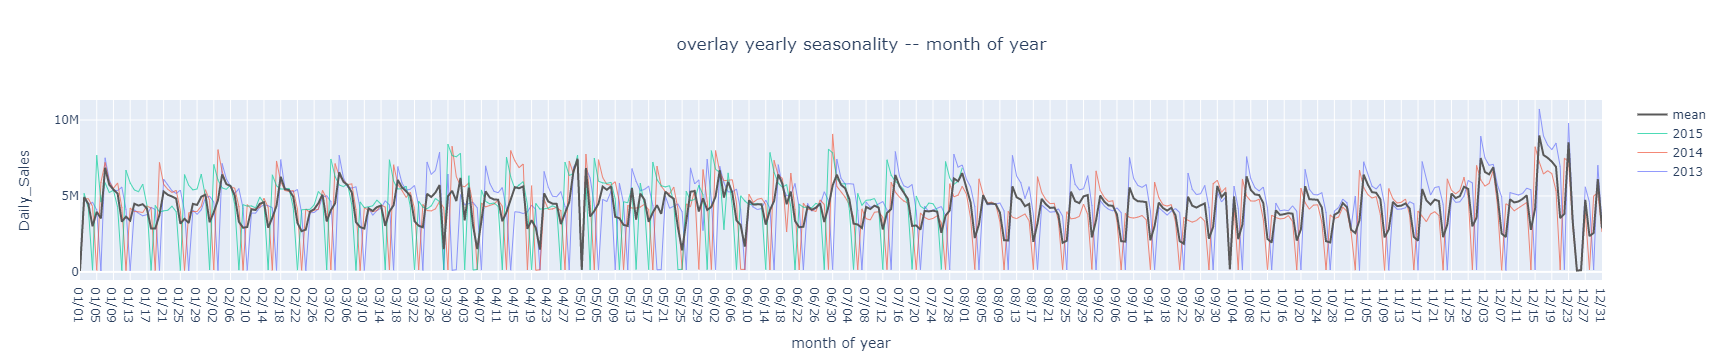

In [9]:
# not centered
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="month_dom",  # show DD/MM
     show_mean=True,      
     show_quantiles=False,
     show_overlays=True,            
     overlay_label_time_feature="year",  # splits by "year"
     overlay_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="month of year",
     ylabel=ts.original_value_col,
     title="overlay yearly seasonality -- month of year",
 )
plotly.io.show(fig)

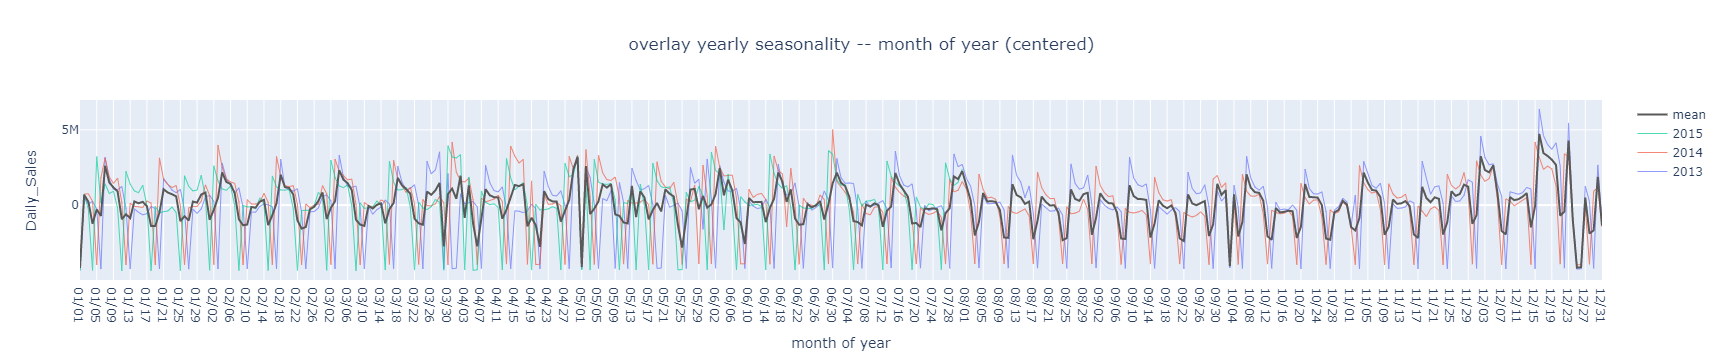

In [10]:
# centered
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="month_dom",  # show DD/MM
     show_mean=True,      
     show_quantiles=False,
     show_overlays=True,            
     overlay_label_time_feature="year",  # splits by "year"
     center_values=True,
     overlay_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="month of year",
     ylabel=ts.original_value_col,
     title="overlay yearly seasonality -- month of year (centered)",
 )
plotly.io.show(fig)

In [57]:
grouped_df = ts.get_quantiles_and_overlays(
     groupby_time_feature="month_dom",  
     show_mean=True,      
     show_quantiles=False,
     show_overlays=True,            
     overlay_label_time_feature="year", 
    center_values=False
 )
grouped_df.head()

category           mean    overlay                      
name               mean       2013       2014       2015
month_dom                                               
01/01      6.641067e+04    58165.0    67227.0    73840.0
01/02      4.924928e+06  4822042.0  4796170.0  5156571.0
01/03      4.470278e+06  4415571.0  4820120.0  4175144.0
01/04      3.005477e+06  4587035.0  4317808.0   111587.0
01/05      3.952301e+06  4078281.0   107173.0  7671448.0

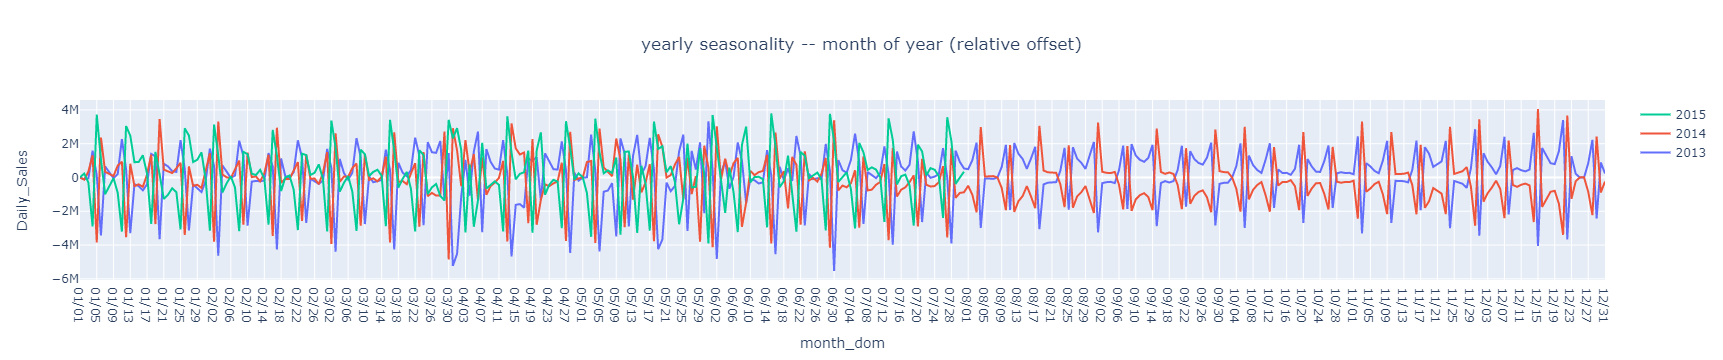

In [58]:
overlay_minus_mean = grouped_df[OVERLAY_COL_GROUP] - grouped_df[MEAN_COL_GROUP].values 
x_col = overlay_minus_mean.index.name
overlay_minus_mean.reset_index(inplace=True)

fig = plot_multivariate(  
     df=overlay_minus_mean,
     x_col=x_col,
     ylabel=ts.original_value_col,
     title="yearly seasonality -- month of year (relative offset)")
plotly.io.show(fig)

## Weekly Seasonality

* The interactions are used to group weekly seasonality patterns, especially useful when the overlays are showing messy patterns

### Overall

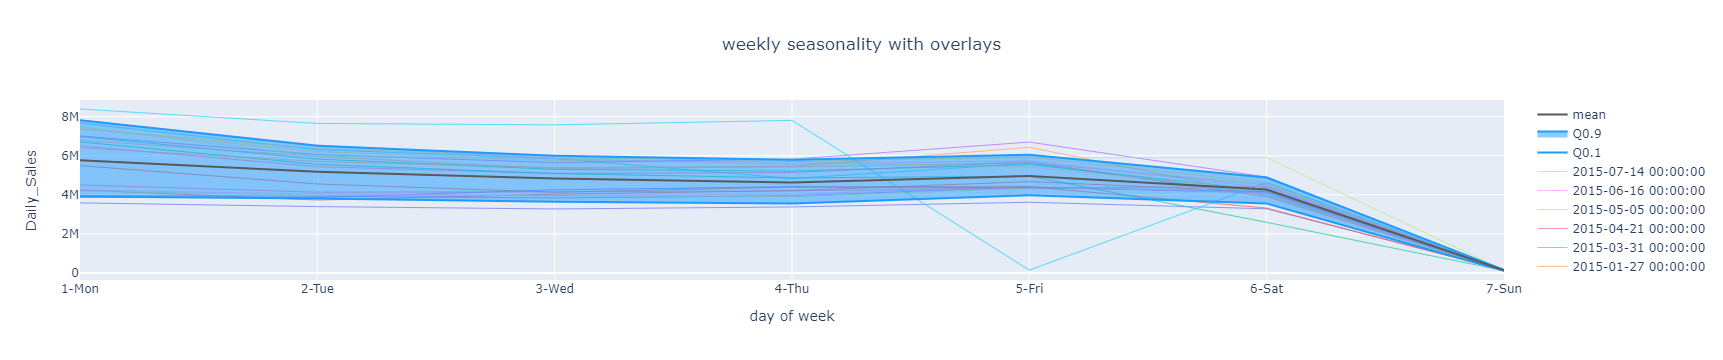

In [18]:
# not centered
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="str_dow",
     show_mean=True,      
     show_quantiles=True,
     show_overlays=20,  # randomly choose 20 overlays    
     overlay_label_sliding_window_size=7,  # in this data, it means weekly 
     overlay_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="day of week",
     ylabel=ts.original_value_col,
     title="weekly seasonality with overlays",
 )
plotly.io.show(fig)

### Time Dimension Interaction

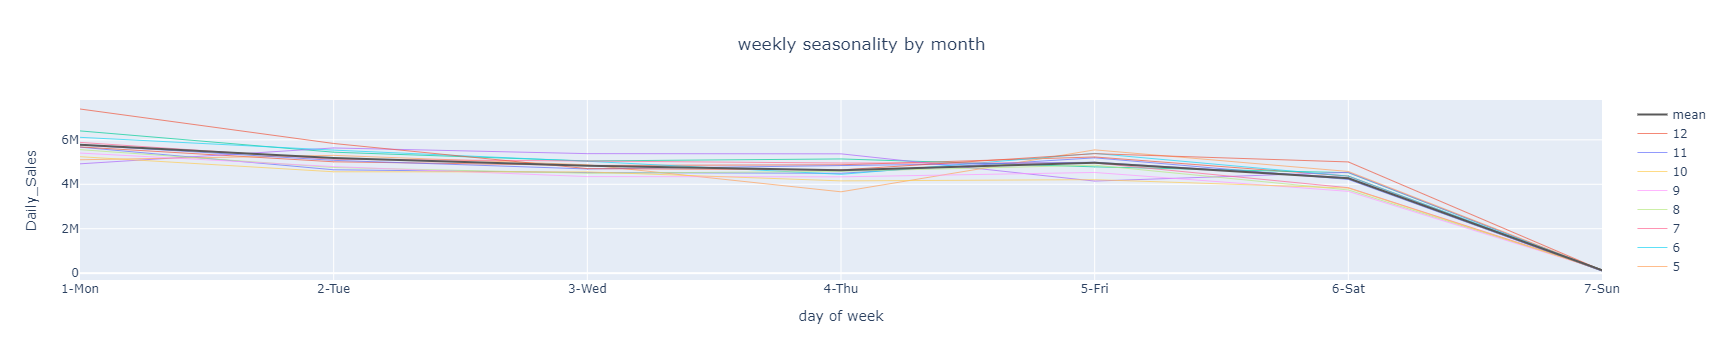

In [51]:
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="str_dow",
     show_mean=True,
     show_quantiles=False,
     show_overlays=True,
     overlay_label_time_feature="month",  # splits overlays by month
     overlay_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="day of week",
     ylabel=ts.original_value_col,
     title="weekly seasonality by month",
 )
plotly.io.show(fig)

### Event or Holiday Interaction

In [24]:
df_dom = add_groupby_column(
     df=ts.df,
     time_col=TIME_COL,           
     groupby_time_feature="month_dom")
df_dom

{'df':                    ts        y month_dom
 2013-01-01 2013-01-01    58165     01/01
 2013-01-02 2013-01-02  4822042     01/02
 2013-01-03 2013-01-03  4415571     01/03
 2013-01-04 2013-01-04  4587035     01/04
 2013-01-05 2013-01-05  4078281     01/05
 ...               ...      ...       ...
 2015-07-27 2015-07-27  7267752     07/27
 2015-07-28 2015-07-28  6181582     07/28
 2015-07-29 2015-07-29  5767310     07/29
 2015-07-30 2015-07-30  5962316     07/30
 2015-07-31 2015-07-31  6847301     07/31
 
 [942 rows x 3 columns],
 'groupby_col': 'month_dom'}

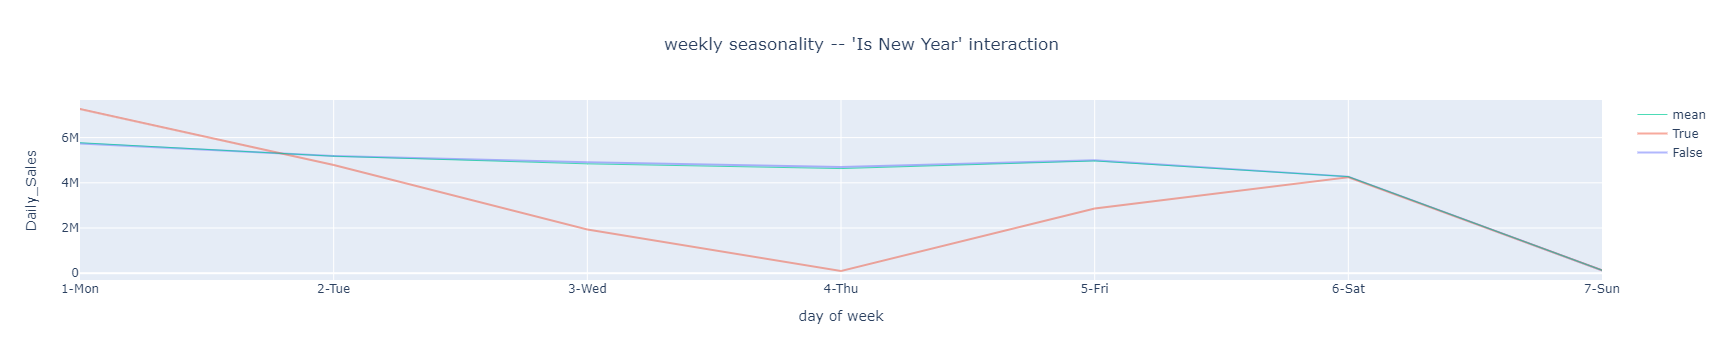

In [52]:
added_col = df_dom["groupby_col"]
month_dom = df_dom["df"][added_col]
is_newyear = (month_dom >= '12/23') & (month_dom <= '12/31')

fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="str_dow",
     show_mean=True,
     show_quantiles=False,
     show_overlays=True,
     overlay_label_custom_column = is_newyear,
     overlay_style={"line": {"width": 2}, "opacity": 0.5},
     mean_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="day of week",
     ylabel=ts.original_value_col,
     title="weekly seasonality -- 'Is New Year' interaction",
 )
plotly.io.show(fig)

### Seasonality Changes Overtime
* Check whether the seasonality changes overtime
  * In this case, we are checking weekly seasonality's changes
* The size of `groupby_sliding_window_size` is up to you.
  * Larger size might hide meaningful changes
  * Small size might bring in noise

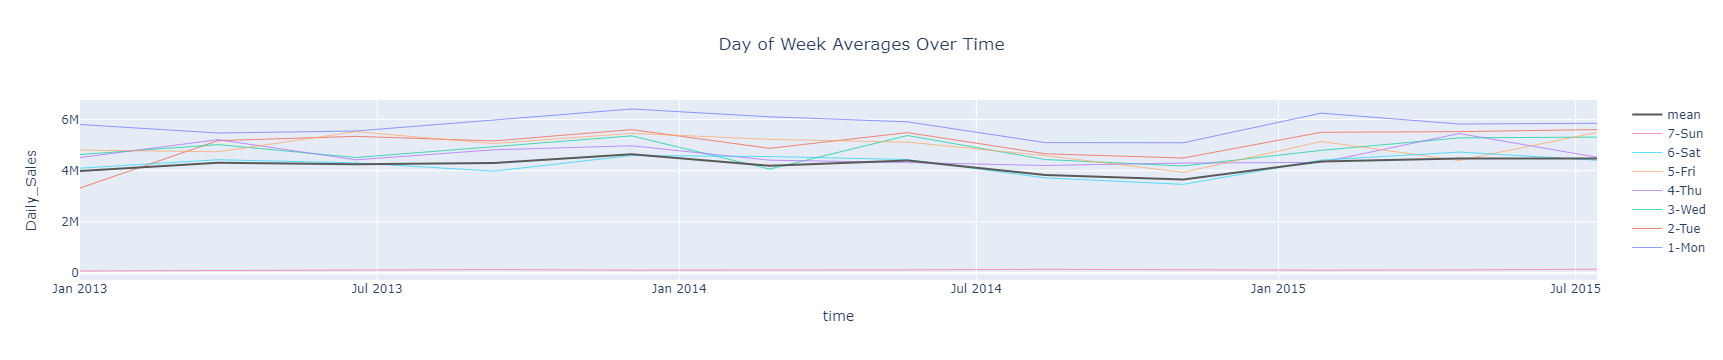

In [54]:
fig = ts.plot_quantiles_and_overlays(
     groupby_sliding_window_size=7*12,
     show_mean=True,
     show_quantiles=False,
     show_overlays=True,
     overlay_label_time_feature="str_dow",
     overlay_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="time",
     ylabel=ts.original_value_col,
     title="Day of Week Averages Over Time",
 )
plotly.io.show(fig)

## Quarterly Seasonality

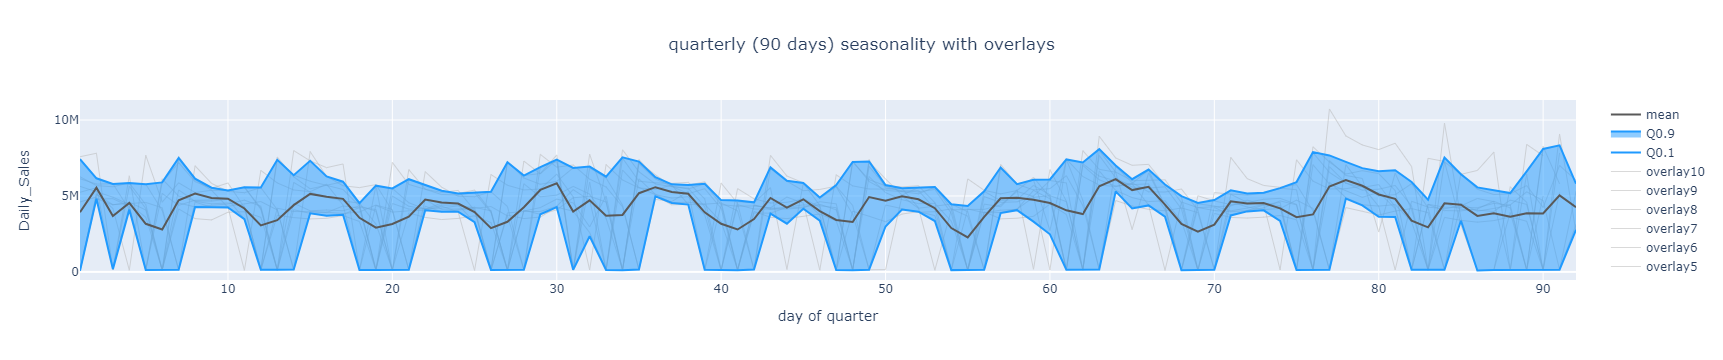

In [62]:
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="doq",
     show_mean=True,      
     show_quantiles=True,
     show_overlays=20,  # randomly choose 20 overlays    
     xlabel="day of quarter",
     ylabel=ts.original_value_col,
     title="quarterly (90 days) seasonality with overlays",
 )
plotly.io.show(fig)

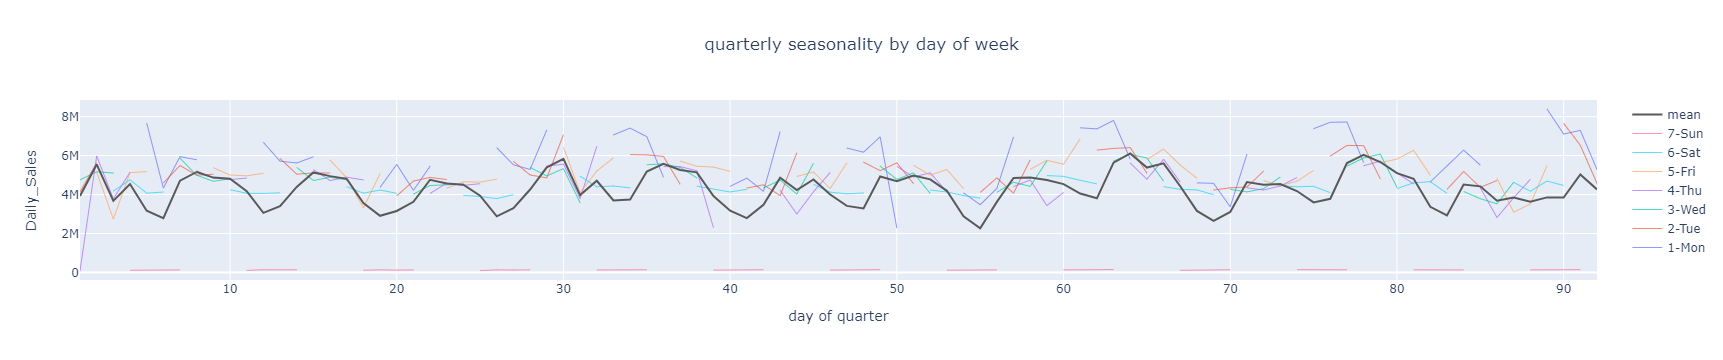

In [66]:
# interaction by day of week
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="doq",
     show_mean=True,
     show_quantiles=False,
     show_overlays=True,
     overlay_label_time_feature="str_dow",  # splits overlays by day of week
     overlay_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="day of quarter",
     ylabel=ts.original_value_col,
     title="quarterly seasonality by day of week",
 )
plotly.io.show(fig)

## Monthly Seasonality

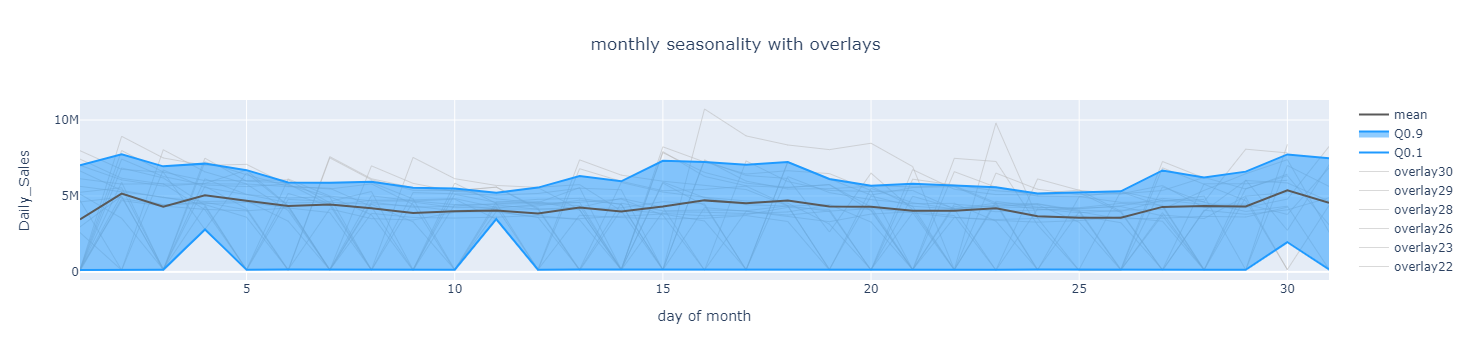

In [63]:
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="dom",
     show_mean=True,      
     show_quantiles=True,
     show_overlays=20,  # randomly choose 20 overlays    
     xlabel="day of month",
     ylabel=ts.original_value_col,
     title="monthly seasonality with overlays",
 )
plotly.io.show(fig)

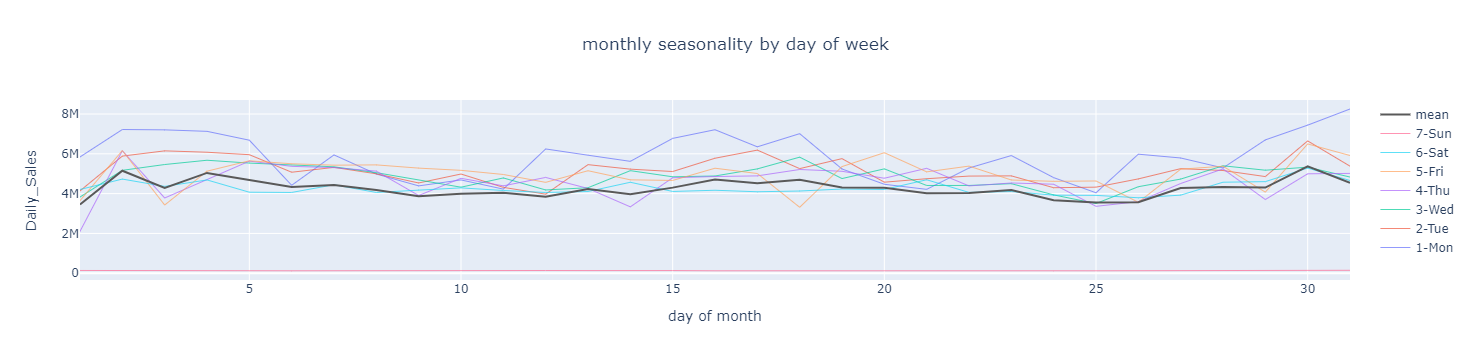

In [67]:
# interaction by day of week
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="dom",
     show_mean=True,
     show_quantiles=False,
     show_overlays=True,
     overlay_label_time_feature="str_dow",  # splits overlays by day of week
     overlay_style={"line": {"width": 1}, "opacity": 0.7},
     xlabel="day of month",
     ylabel=ts.original_value_col,
     title="monthly seasonality by day of week",
 )
plotly.io.show(fig)